In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("data_A.csv")
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41238 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


melihat dari data yang diberikan terdapat beberapa feature yang dapat di drop seperti id dan surname

In [33]:
df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [34]:
df.isna().sum()

CreditScore        20
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

jumlah missing value pada data yang diberikan tidak banyak sehingga dapat drop data missing tersebut

In [35]:
df.dropna(inplace=True)

In [36]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [37]:
numeric = df.select_dtypes(['float64', 'int64']).columns
categorical = df.drop(numeric, axis=1).columns

melakukan pembagian tipe variable untuk memudahkan proses processing pada data

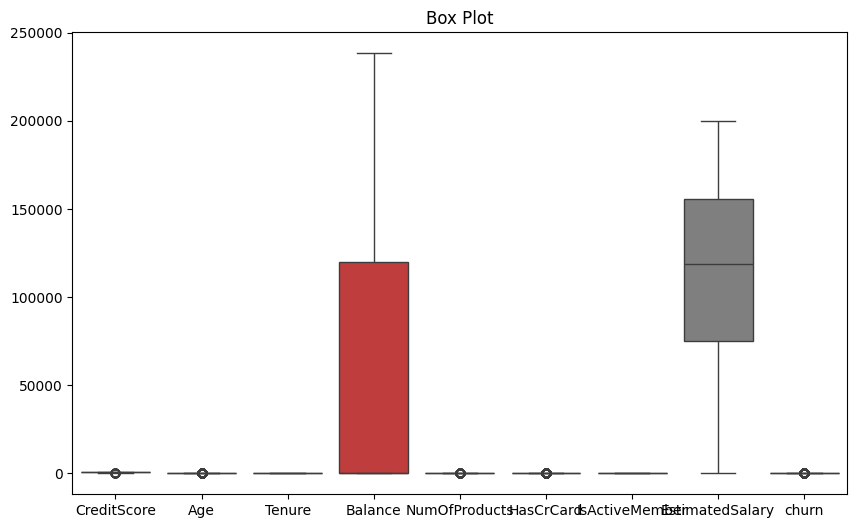

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric])
plt.title('Box Plot')
plt.show()

outlier yang ada pada data tidak terlalu ketara sehingga dapat dihiraukan pada data ini 

In [39]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


<Axes: >

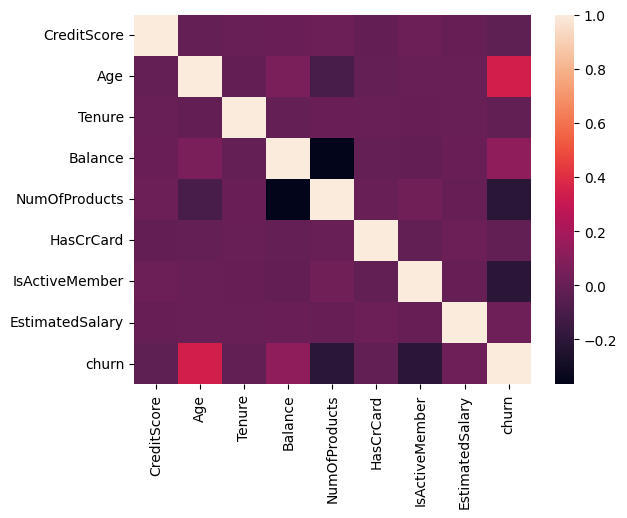

In [40]:
sns.heatmap(df[numeric].corr())

korelasi cenderung lemah tetapi age dan churn memiliki korelasi yang cukup kuat 

In [41]:
df[categorical].head()

,Geography,Gender
0,France,Male
1,Germany,Male
2,Spain,Female
3,France,Female
4,France,Female


In [42]:
df['Geography'].nunique()

3

In [43]:
df['Gender'].nunique()

2

In [44]:
X = df.drop(['churn'], axis=1)
y = df['churn']

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32990, 10)
(32990,)
(8248, 10)
(8248,)


melakukan pembagian dataset

In [46]:
from sklearn.preprocessing import OneHotEncoder


for col in categorical:
  encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
  # Fit and transform the 'Gender' column for each DataFrame
  encoded_train = encoder.fit_transform(x_train[[col]])
  encoded_test = encoder.transform(x_test[[col]])

  columns_to_drop = [col]

  # Reset indices before concatenation
  x_train = x_train.reset_index(drop=True)
  x_test = x_test.reset_index(drop=True)
  x_train = pd.concat([x_train.drop(columns=columns_to_drop), pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)
  x_test = pd.concat([x_test.drop(columns=columns_to_drop), pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)

c:\Users\marvi\anaconda3\envs\ComputerVision\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\marvi\anaconda3\envs\ComputerVision\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
dengan data categorical yang dimiliki saya menggunakan one hot encoder untuk meng-encode data categorical tersebut

SyntaxError: invalid syntax (3711050920.py, line 1)

In [ ]:
import sklearn; print(sklearn.__version__)

1.3.2


In [ ]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,850.0,29.0,2,142882.49,2,1,0,89327.67,0.0,1.0,0.0,1.0,0.0
1,732.0,48.0,10,150315.92,1,1,0,133486.36,0.0,0.0,1.0,1.0,0.0
2,684.0,27.0,8,116322.27,4,1,0,35640.12,0.0,1.0,0.0,1.0,0.0
3,615.0,52.0,3,0.00,2,1,1,173952.50,1.0,0.0,0.0,0.0,1.0
4,675.0,50.0,1,133204.91,1,1,1,8270.06,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,628.0,34.0,6,0.00,2,1,1,157097.02,1.0,0.0,0.0,1.0,0.0
8244,598.0,37.0,5,142688.57,2,1,0,110953.33,0.0,1.0,0.0,0.0,1.0
8245,736.0,35.0,8,0.00,2,1,1,195052.12,1.0,0.0,0.0,0.0,1.0
8246,588.0,41.0,2,0.00,1,0,1,157891.86,1.0,0.0,0.0,0.0,1.0


In [ ]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

kemudian membuat dataset untuk process scaling karena dataset ini dapat digunakan untuk membandingkan dataset yang tidak di encode dengan yang di encode

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

continous = ['CreditScore', 'Balance', 'EstimatedSalary']

for col in continous:
  scaler = MinMaxScaler()
  x_train_scaled[col] = scaler.fit_transform(x_train_scaled[col].values.reshape(-1, 1))
  x_test_scaled[col] = scaler.transform(x_test_scaled[col].values.reshape(-1, 1))

process encoding pada beberapa continous feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
def model_comparision(X_train, X_test, y_train, y_test, **model_kwargs):

    # Initialize models with additional kwargs
    models = {
        'Random Forest': RandomForestClassifier(**model_kwargs.get('Random Forest', {})),
        'XGBoost': XGBClassifier(**model_kwargs.get('XGBoost', {}))
    }

    # Train and evaluate each model
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        print(classification_report(y_test, y_pred))

    # Create a DataFrame for results
    results_df = pd.DataFrame(results)

    return results_df


function diatas akan mempermudah process daripada comparasi model dan dataset dan juga proses evaluasi terharap model

In [ ]:
model_kwargs = {
  'RandomForest': {'n_estimators': 100, 'max_depth': 10, 'random_state': 42},
  'XGBoost': {'n_estimators': 100, 'max_depth': 5}
}

mengatur hyper params dari model yang akan digunakan

In [ ]:
results_encode_clean = model_comparision(x_train, x_test, y_train, y_test, **model_kwargs)
print("Model Evaluation with OHE Clean Dataset Results:")
print(results_encode_clean)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6528
           1       0.73      0.52      0.60      1720

    accuracy                           0.86      8248
   macro avg       0.80      0.73      0.76      8248
weighted avg       0.85      0.86      0.85      8248

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6528
           1       0.72      0.55      0.62      1720

    accuracy                           0.86      8248
   macro avg       0.80      0.75      0.77      8248
weighted avg       0.85      0.86      0.85      8248

Model Evaluation with OHE Clean Dataset Results:
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.858511   0.849151  0.858511  0.849205
1        XGBoost  0.861542   0.853160  0.861542  0.854156


In [ ]:
results_encode_scaled_clean = model_comparision(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, **model_kwargs)
print("Model Evaluation with OHE and MinMaxScaler Clean Dataset Results:")
print(results_encode_scaled_clean)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6528
           1       0.73      0.52      0.60      1720

    accuracy                           0.86      8248
   macro avg       0.80      0.73      0.76      8248
weighted avg       0.85      0.86      0.85      8248

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6528
           1       0.71      0.54      0.61      1720

    accuracy                           0.86      8248
   macro avg       0.80      0.74      0.76      8248
weighted avg       0.85      0.86      0.85      8248

Model Evaluation with OHE and MinMaxScaler Clean Dataset Results:
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.858147   0.848713  0.858147  0.848748
1        XGBoost  0.858754   0.850000  0.858754  0.851198


terlihat penggunaan data yang di scaled dan di encode memiliki hasil yang lebih baik dari pada hanya di encode dan juga dataset XGB terlihat lebih baik juga

In [ ]:
model_kwargs2 = {
  'RandomForest': {
    'n_estimators': 200, 
    'max_depth': 12,      
    'random_state': 42,   
    'min_samples_split': 2, 
    'min_samples_leaf': 5, 
  },
  'XGBoost': {
    'n_estimators': 150, 
    'max_depth': 7,       
    'learning_rate': 0.1,
    'gamma': 0.4,      
    'colsample_bytree': 0.8, 
  }
}

setelah mengetahui dataset mana yang lebih baik saatnya mencoba pada parameter yang lebih kompleks untuk meilihat apakah ada peningkatan

In [ ]:
results_encode_scaled_clean = model_comparision(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, **model_kwargs2)
print("Model Evaluation with OHE and MinMaxScaler Clean Dataset Results:")
print(results_encode_scaled_clean)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6528
           1       0.73      0.52      0.60      1720

    accuracy                           0.86      8248
   macro avg       0.80      0.73      0.76      8248
weighted avg       0.85      0.86      0.85      8248

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6528
           1       0.72      0.54      0.62      1720

    accuracy                           0.86      8248
   macro avg       0.80      0.74      0.77      8248
weighted avg       0.85      0.86      0.85      8248

Model Evaluation with OHE and MinMaxScaler Clean Dataset Results:
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.858754   0.849443  0.858754  0.849509
1        XGBoost  0.860936   0.852414  0.860936  0.853369


terlihat ada peningkatan sehingga XGB dengan params ini dapat digunakan untuk di export 

In [ ]:
import pickle
from xgboost import XGBClassifier


export_path = r"\UTS"
# Create XGBoost classifier
model = XGBClassifier( 
    n_estimators=150,
    max_depth=7,
    learning_rate=0.1,
    gamma=0.4,
    colsample_bytree=0.8
)

# Train the model
model.fit(x_train_scaled, y_train_scaled)

# Export the model to a pickle file
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_scaled, y_test_scaled)
print(result)

print(f"XGBoost model trained and exported to: {export_path}")

0.8609359844810863
XGBoost model trained and exported to: \UTS


prosses evaluasi dan export pada model yang telah dipilih